In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This code reads an image using OpenCV, converts it from BGR to RGB format for correct visualization, and displays it using Matplotlib. The axis is turned off to provide a clean image output.

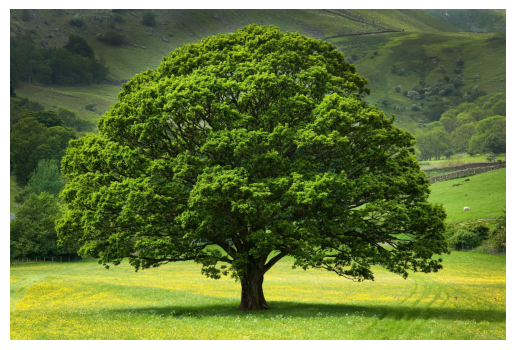

In [22]:
# Path of the image stored in Google Drive
file_path = "/content/drive/My Drive/OpenCV/tree.jpg"

# Read the image using OpenCV (image is read in BGR format)
img = cv2.imread(file_path)

# Check whether the image is loaded successfully
if img is None:
    print(f"Error: Image not loaded from {file_path}")
else:
    # Convert image from BGR to RGB
    # (Matplotlib expects RGB format)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image using matplotlib
    plt.imshow(img_rgb)

    # Turn off axis for a cleaner display
    plt.axis('off')


This code performs negative image transformation by inverting the intensity values of each pixel using the formula s = 255 − r. The processed image is saved and displayed after converting it from BGR to RGB format for correct visualization.

(np.float64(-0.5), np.float64(2047.5), np.float64(1364.5), np.float64(-0.5))

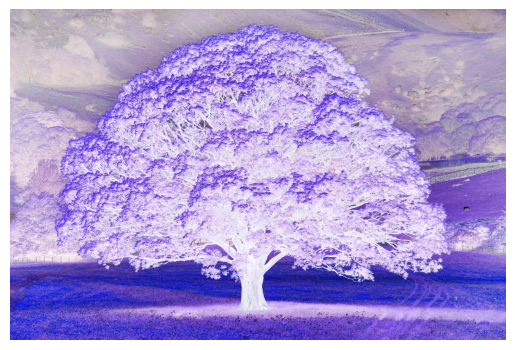

In [23]:
# Get image dimensions: height, width, and number of color channels
height, width, channels = img.shape

# Loop through each pixel in the image
for y in range(height):
    for x in range(width):
        for c in range(3):   # Loop through color channels (B, G, R)

            # Apply negative transformation:
            # new_pixel = 255 - old_pixel
            img[y, x, c] = 255 - img[y, x, c]

# Save the negative image to a file
cv2.imwrite("output.jpg", img)

# Display the negative image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')


This code performs contrast stretching (min–max normalization) by linearly mapping the minimum and maximum intensity values of the image to the full range
[
0
,
255
]
[0,255]. This enhances the contrast and improves visibility of image details.

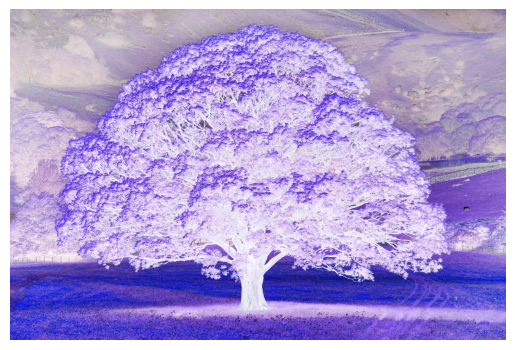

In [24]:
# Check whether the image is loaded correctly
if img is None:
    print("Error: Image not loaded")
else:
    # Convert image to float for accurate mathematical operations
    img = img.astype(np.float32)

    # Find minimum and maximum pixel intensity values in the image
    min_val = img.min()
    max_val = img.max()

    # Get image dimensions
    height, width, channels = img.shape

    # Apply contrast stretching (min–max normalization)
    for y in range(height):
        for x in range(width):
            for c in range(3):
                img[y, x, c] = ((img[y, x, c] - min_val) /
                                (max_val - min_val)) * 255

    # Convert image back to unsigned 8-bit integer format
    img = img.astype(np.uint8)

    # Display the contrast-enhanced image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")


This code performs bit-plane slicing on a grayscale image. Each bit plane represents the contribution of a specific bit (from LSB to MSB) to the overall image. Higher-order bit planes contain more significant visual information, while lower-order planes capture fine details and noise.

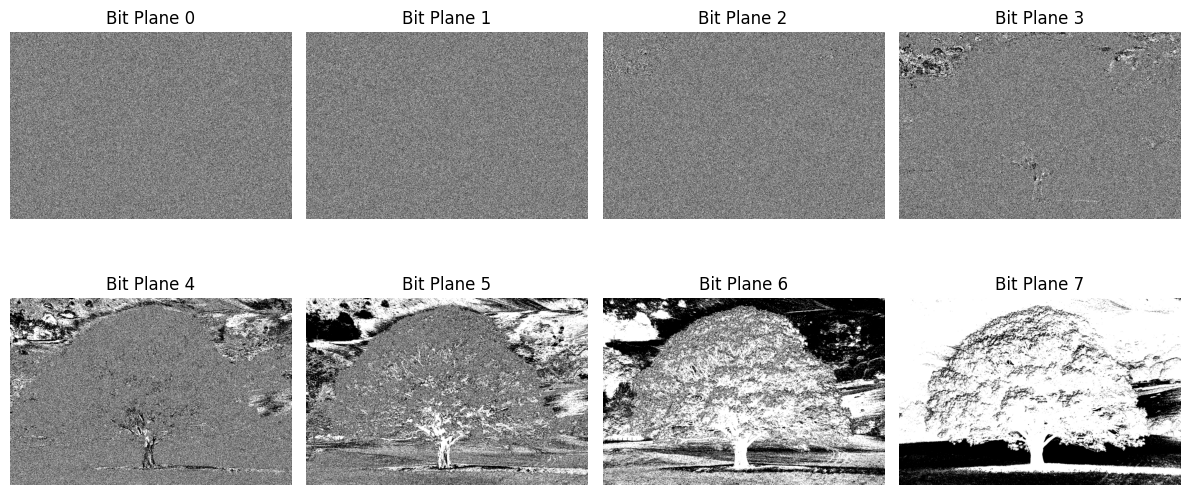

In [25]:
# Assign the grayscale image for bit-plane slicing
image = gray_image

# Create a figure to display all bit planes
plt.figure(figsize=(12, 6))

# Loop through 8 bit planes (0 to 7)
for k in range(8):
    # Extract the k-th bit plane using bitwise operations
    bit_plane = (image >> k) & 1

    # Scale values to 0 or 255 for proper visualization
    bit_plane = bit_plane * 255

    # Display each bit plane in a 2x4 grid
    plt.subplot(2, 4, k + 1)
    plt.imshow(bit_plane, cmap='gray')
    plt.title(f'Bit Plane {k}')
    plt.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the bit-plane sliced images
plt.show()


This code converts a color image from BGR format to grayscale using OpenCV and displays it in Google Colab using cv2_imshow, which is required because cv2.imshow() does not work in Colab environments.

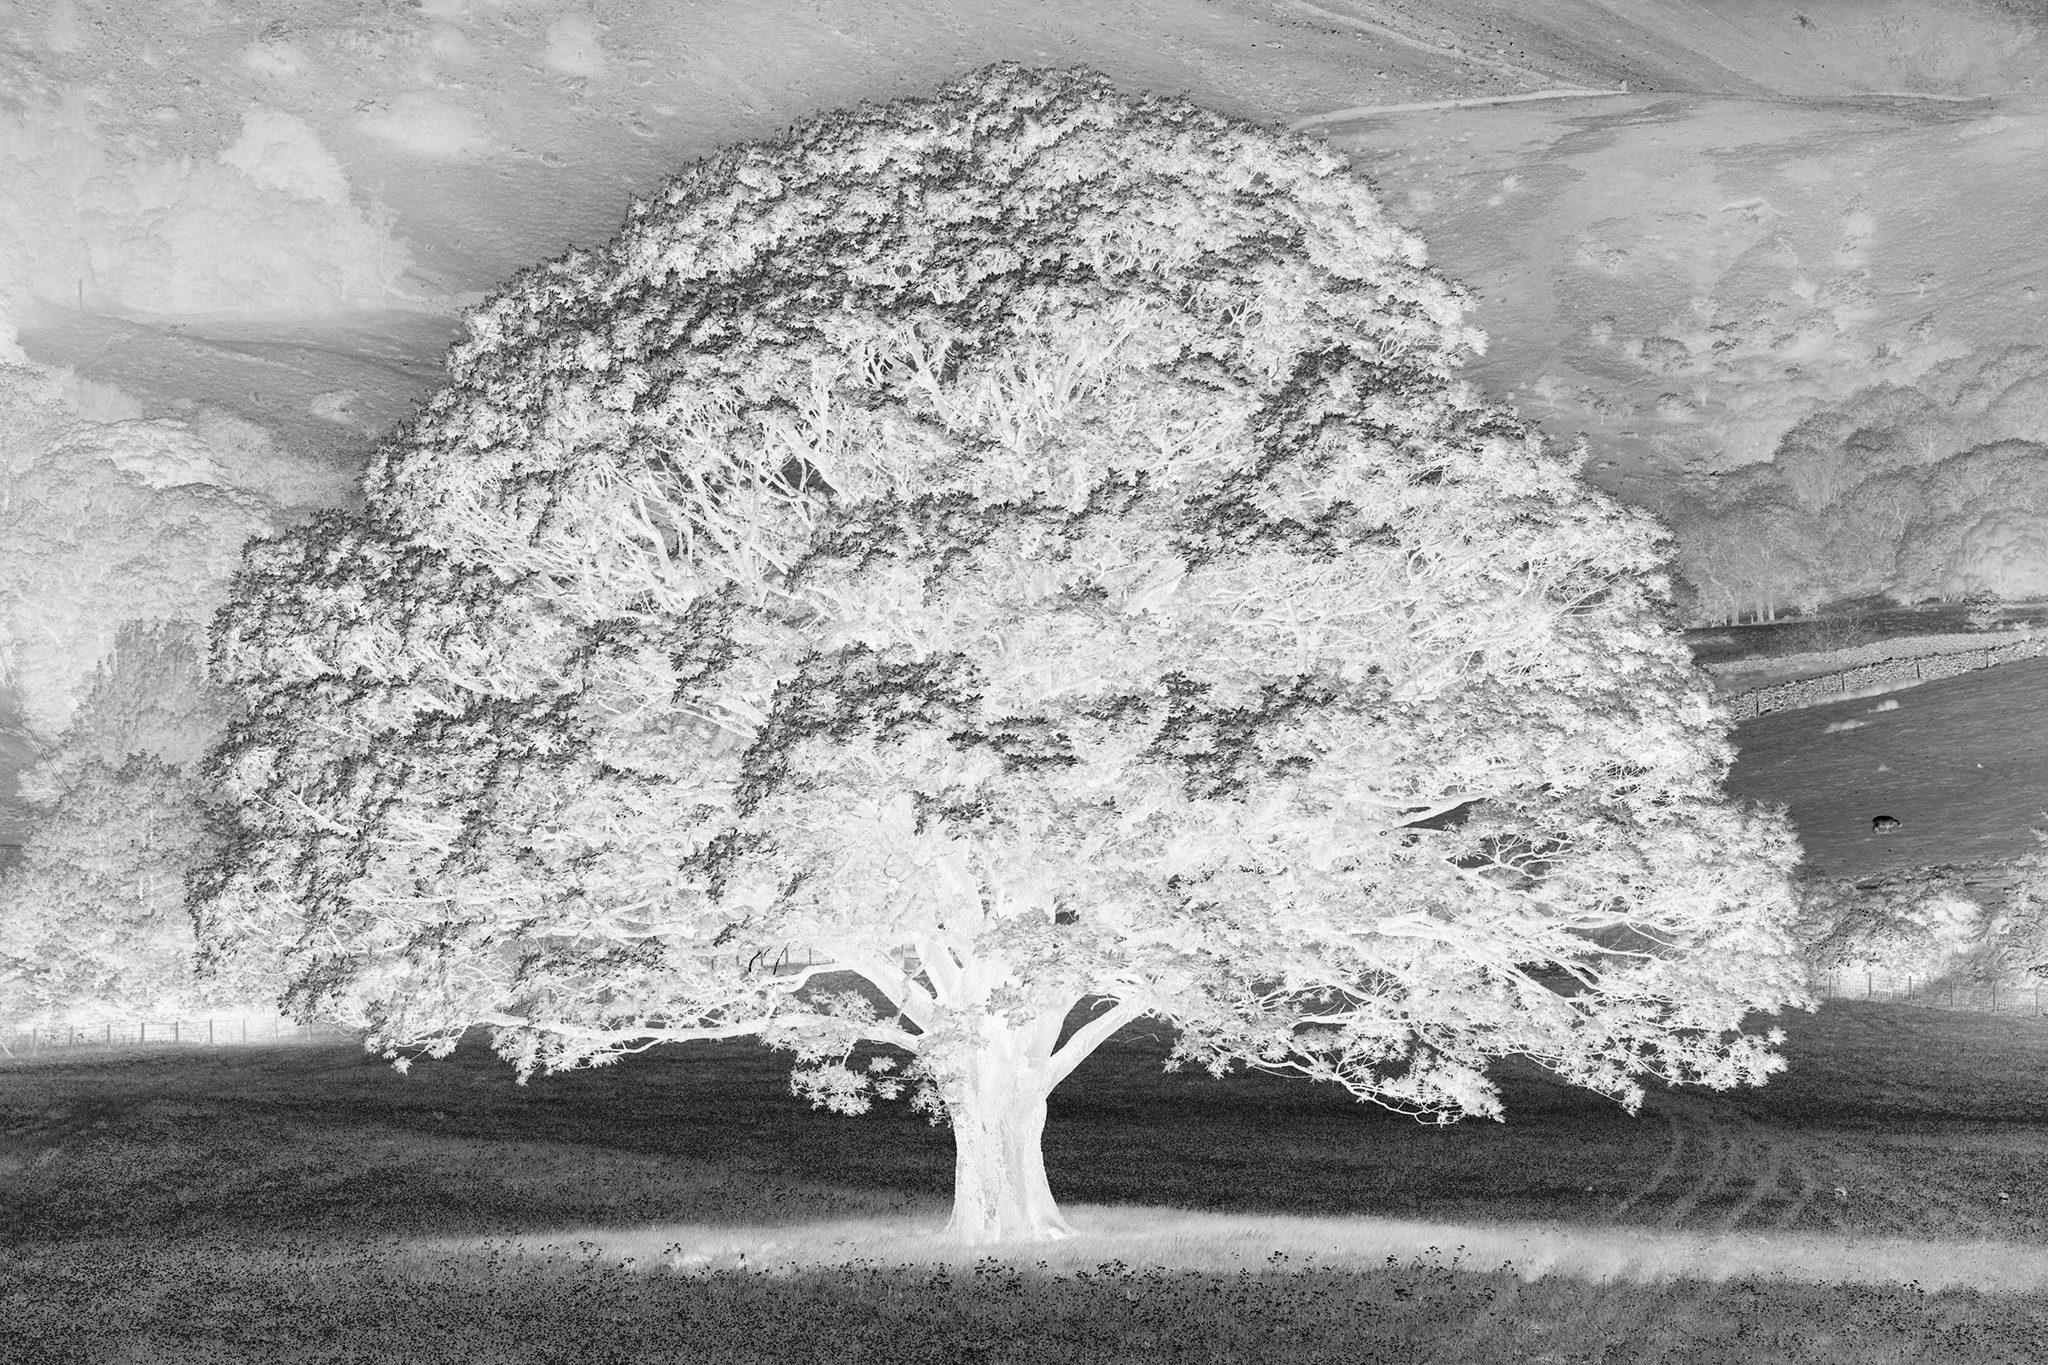

In [27]:
# Import cv2_imshow for displaying images in Google Colab
from google.colab.patches import cv2_imshow

# Convert the color image from BGR to grayscale
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display the grayscale image using OpenCV's Colab-compatible function
cv2_imshow(gray_image)
